In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def z_score_cutoff(data_series):
    mean = data_series.mean()
    std = data_series.std()
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std
    return lower_bound, upper_bound

def iqr_cutoff(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [3]:
o = pd.read_csv("./data/online.csv",sep=";").query("product == 'ORCHIDS'")

In [4]:
# load prices data to one df
prices = [pd.read_csv("./data/prices_round_2_day_-1.csv",sep=";"),
          pd.read_csv("./data/prices_round_2_day_0.csv",sep=";"),
        #   pd.read_csv("./data/prices_round_2_day_1.csv",sep=";")
          ]
prices = pd.concat(prices, axis = 0)
prices['timestamp_new'] = (prices['DAY'] + 1) * 1000000 + prices['timestamp'] + 100
prices.set_index('timestamp_new', inplace = True)

In [5]:
day1 = pd.read_csv("./data/prices_round_2_day_-1.csv",sep=";")
day2 = pd.read_csv("./data/prices_round_2_day_0.csv",sep=";")
# day3 = pd.read_csv("./data/prices_round_2_day_1.csv",sep=";")

<Axes: xlabel='ORCHIDS', ylabel='Density'>

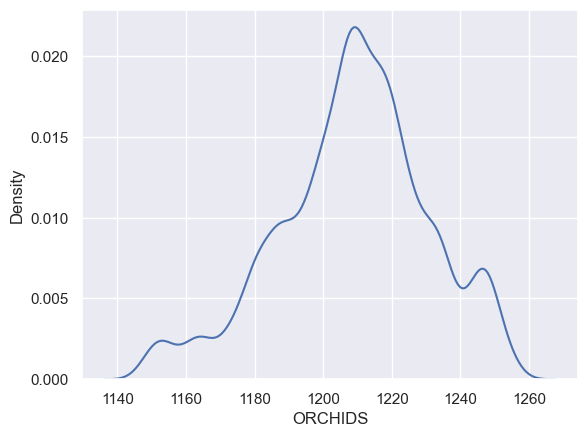

In [6]:
sns.kdeplot(day1['ORCHIDS'])

In [7]:
day1['HUMIDITY_out'] = (day1['HUMIDITY'] > 80) | (day1['HUMIDITY'] < 60)
day1['sunligh_cumsum'] = np.log(np.cumsum(day1['SUNLIGHT']))
day1['sunligh_cumsum'] = np.log(np.cumsum(day1['SUNLIGHT']))

In [8]:
day1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,HUMIDITY_out,sunligh_cumsum
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1,False,7.824046
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,False,8.517077
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,False,8.922427
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,False,9.209995
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,False,9.433025
...,...,...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,True,17.404170
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,True,17.404277
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,True,17.404385
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1,True,17.404493


In [9]:
feature = "SUNLIGHT"
print(prices[feature].min(), prices[feature].max())
print(z_score_cutoff(prices[feature]))
print(iqr_cutoff(prices[feature]))

1397.3049 4513.9863
(55.484489296798984, 5843.798966757597)
(-717.1557999999995, 6528.592999999999)


In [10]:
prices[feature].median()

2981.0864

In [11]:
# df.set_index('timestamp_new', inplace = True)

In [12]:
df = day1

fig, ax1 = plt.subplots(figsize=[200,80])
# ax1 = fig.add_subplot(111, ylabel='Google price in $')
df["ORCHIDS"].plot(ax=ax1, color='b', lw=2)
df["HUMIDITY"].plot(ax=ax1, color='r', lw=2)
plt.title("Turtle Trading Strategy")
plt.show()

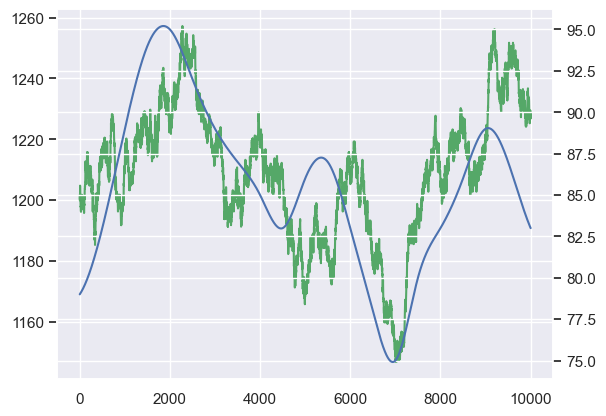

In [13]:
# Sample data
x = range(10)
# Plot the first line
fig, ax1 = plt.subplots()
ax1.plot(df["ORCHIDS"], 'g-')
# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df["HUMIDITY"], 'b-')
# ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [15]:
# np.corrcoef()

In [16]:
np.corrcoef(prices.reset_index(drop = True)["ORCHIDS"], prices.reset_index(drop = True)["HUMIDITY"])

array([[1.        , 0.77414076],
       [0.77414076, 1.        ]])

In [18]:
product = 'STARFRUIT'
endpoint= 5000
plt.figure(figsize=[200,80])
# data.query(f"product == '{product}'")['mid_price'][:endpoint].plot(color='blue', lw=2., legend=True)
plt.plot(s.query(f"product == '{product}'")['vwap'][:endpoint],color='y', lw=2.)
# s.query(f"product == '{product}'")['bid_price_1'][:endpoint].plot(color='g', lw=2., legend=True)
# data.query(f"product == '{product}'")['ask_price_1'][:endpoint].plot(color='r', lw=2., legend=True)
for i in signal[:endpoint].index:
    if signal[i]:
        plt.axvline(x=i, color='g', linestyle='--', linewidth=2)
    if neg_signal[i]:
        plt.axvline(x=i, color='r', linestyle='--', linewidth=2)
plt.show()

UndefinedVariableError: name 'product' is not defined

<Figure size 20000x8000 with 0 Axes>